# 中文文本分类-THUCNews数据集

## 数据说明与初步处理
### 数据集下载
本文采用了清华NLP组提供的THUCNews新闻文本分类数据集的子集
数据下载链接：
THUCNews数据子集：https://pan.baidu.com/s/1hugrfRu 密码：qfud

### 数据量
该数据集使用了其中的10个分类，每个分类6500条，总共65000条新闻数据。
类别如下：体育, 财经, 房产, 家居, 教育, 科技, 时尚, 时政, 游戏, 娱乐
数据集共有三个文件，如下：
cnews.train.txt: 训练集(500010条)
cnews.val.txt: 验证集(50010条)
cnews.test.txt: 测试集(1000*10条)

原文链接：https://blog.csdn.net/qq_36047533/article/details/88360833

In [21]:
import pandas as pd
train_data=pd.read_csv('D:\project\data\cnews.train.txt',sep='\t',names=['label','content'])
test_data=pd.read_csv('D:\project\data\cnews.test.txt',sep='\t',names=['label','content'])
val_data=pd.read_csv("D:\project\data\cnews.val.txt",sep='\t',names=['label','content'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    50000 non-null  object
 1   content  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    10000 non-null  object
 1   content  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [23]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5000 non-null   object
 1   content  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


## 将数据划分为作业要求的["体育", "财经", "房产", "家居", "教育", "科技"]训练集4000\*6、验证集500\*6、测试集500\*6

In [24]:
# target_list 包含要提取的类别
target_list = ["体育", "财经", "房产", "家居", "教育", "科技"]

# 创建一个空列表来存储每个类别的前4000行
dfs = []

# 遍历目标类别列表，提取每个类别的前4000行
for category in target_list:
    category_df = train_data[train_data["label"] == category].iloc[:4000, :]
    dfs.append(category_df)

# 使用 concat 函数将所有类别提取的数据合并为一个 DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    24000 non-null  object
 1   content  24000 non-null  object
dtypes: object(2)
memory usage: 375.1+ KB


In [25]:
combined_df.head()

,label,content
0,体育,马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...
1,体育,商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...
2,体育,冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...
3,体育,辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...
4,体育,揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道 谢亚龙已经被公安...


In [26]:
# 将合并后的 DataFrame 保存为用制表符分隔的 CSV 文件
combined_df.to_csv('D:\project\data\\train_data.csv', sep='\t', index=False)

In [27]:
# 创建一个空列表来存储每个类别的前4000行
dfs = []
# 遍历目标类别列表，提取每个类别的前500行
for category in target_list:
    category_df = val_data[val_data["label"] == category].iloc[:500, :]
    dfs.append(category_df)

# 使用 concat 函数将所有类别提取的数据合并为一个 DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3000 non-null   object
 1   content  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [28]:
combined_df.head()

,label,content
0,体育,黄蜂vs湖人首发：科比带伤战保罗 加索尔救赎之战 新浪体育讯北京时间4月27日，NBA季后赛...
1,体育,1.7秒神之一击救马刺王朝于危难 这个新秀有点牛！新浪体育讯在刚刚结束的比赛中，回到主场的马...
2,体育,1人灭掘金！神般杜兰特！ 他想要分的时候没人能挡新浪体育讯在NBA的世界里，真的猛男，敢于直...
3,体育,韩国国奥20人名单：朴周永领衔 两世界杯国脚入选新浪体育讯据韩联社首尔9月17日电 韩国国奥...
4,体育,天才中锋崇拜王治郅 周琦：球员最终是靠实力说话2月14日从土耳其男篮邀请赛回到北京之后，周琦...


In [29]:
# 将合并后的 DataFrame 保存为用制表符分隔的 CSV 文件
combined_df.to_csv('D:\project\data\\val_data.csv', sep='\t', index=False)

In [30]:
# 创建一个空列表来存储每个类别的前4000行
dfs = []
# 遍历目标类别列表，提取每个类别的前500行
for category in target_list:
    category_df = test_data[test_data["label"] == category].iloc[:500, :]
    dfs.append(category_df)

# 使用 concat 函数将所有类别提取的数据合并为一个 DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3000 non-null   object
 1   content  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [31]:
combined_df.head()

,label,content
0,体育,鲍勃库西奖归谁属？ NCAA最强控卫是坎巴还是弗神新浪体育讯如今，本赛季的NCAA进入到了末...
1,体育,麦基砍28+18+5却充满寂寞 纪录之夜他的痛阿联最懂新浪体育讯上天对每个人都是公平的，贾维...
2,体育,黄蜂vs湖人首发：科比冲击七连胜 火箭两旧将登场新浪体育讯北京时间3月28日，NBA常规赛洛...
3,体育,双面谢亚龙作秀终成做作 谁来为低劣行政能力埋单是谁任命了谢亚龙？谁放纵了谢亚龙？谁又该为谢亚...
4,体育,兔年首战山西换帅后有虎胆 张学文用乔丹名言励志今晚客场挑战浙江稠州银行队，是山西汾酒男篮的兔...


In [32]:
# 将合并后的 DataFrame 保存为用制表符分隔的 CSV 文件
combined_df.to_csv('D:\project\data\\test_data.csv', sep='\t', index=False)

## 将数据集的label转换为数字
label_dict = {"体育": 0, "财经": 1, "房产": 2, "家居": 3, "教育": 4, "科技": 5}

In [3]:
import numpy as np
import pandas as pd
# 读取数据集
train_data = pd.read_csv('D:\project\data\\train_data.csv', sep='\t')
val_data = pd.read_csv('D:\project\data\\val_data.csv', sep='\t')
test_data = pd.read_csv('D:\project\data\\test_data.csv', sep='\t')
train_data.info()
val_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    24000 non-null  object
 1   content  24000 non-null  object
dtypes: object(2)
memory usage: 375.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3000 non-null   object
 1   content  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3000 non-null   object
 1   content  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [4]:
train_data.head()

,label,content
0,体育,马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...
1,体育,商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...
2,体育,冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...
3,体育,辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...
4,体育,揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道 谢亚龙已经被公安...


In [5]:
# 将数据集的label转换为数字
label_dict = {"体育": 0, "财经": 1, "房产": 2, "家居": 3, "教育": 4, "科技": 5}
train_data["label"] = train_data["label"].map(label_dict)
val_data["label"] = val_data["label"].map(label_dict)
test_data["label"] = test_data["label"].map(label_dict)
train_data.head()

,label,content
0,0,马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...
1,0,商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...
2,0,冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...
3,0,辽足签约危机引注册难关 高层威逼利诱合同笑里藏刀新浪体育讯2月24日，辽足爆发了集体拒签风波...
4,0,揭秘谢亚龙被带走：总局电话骗局 复制南杨轨迹体坛周报特约记者张锐北京报道 谢亚龙已经被公安...


In [6]:
# 将转换结果保存为新的CSV文件
train_data.to_csv('D:\project\data\\train_data_v1.csv', sep='\t', index=False)
val_data.to_csv('D:\project\data\\val_data_v1.csv', sep='\t', index=False)
test_data.to_csv('D:\project\data\\test_data_v1.csv', sep='\t', index=False)

## 分词、向量化、模型训练
运用jieba分词，去除停用词，构建TF-IDF模型，向量化训练集、验证集和测试集，输出特征向量的形状，打印标签的形状，输出标签前五项
调用sklearn库，构建逻辑回归(分类)模型，训练模型，输出模型的准确率（采用宏平均、微平均指标）
输出模型的混淆矩阵


In [10]:
# 分词并去除停用词
import jieba
import pandas as pd
# 读取数据集
train_data = pd.read_csv('D:\project\data\\train_data_v1.csv', sep='\t')
val_data = pd.read_csv('D:\project\data\\val_data_v1.csv', sep='\t')
test_data = pd.read_csv('D:\project\data\\test_data_v1.csv', sep='\t')
# 加载停用词表
stopwords = set()
with open('D:\project\data\\stopwords.txt', 'r', encoding='utf-8') as f:
    for line in f:
        stopwords.add(line.strip())
# 对文本进行分词并去除停用词
def tokenize(text):
    words = jieba.lcut(text)
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

train_data["content"] = train_data["content"].apply(tokenize)
val_data["content"] = val_data["content"].apply(tokenize)
test_data["content"] = test_data["content"].apply(tokenize)
train_data.head()

,label,content
0,0,马晓旭 意外 受伤 国奥 警惕 无奈 大雨 青睐 殷家 军 记者 傅亚雨 沈阳 报道 ...
1,0,商瑞华 首战 复仇 心切 中国 玫瑰 美国 方式 攻克 瑞典 多曼来 瑞典 商瑞华 首战...
2,0,冠军 球队 迎新 欢乐 派对 黄旭获 大奖 张军 赢 PK 赛 新浪 体育讯 12 月 ...
3,0,辽足 签约 危机 引 注册 难关 高层 威逼利诱 合同 笑里藏刀 新浪 体育讯 月 24...
4,0,揭秘 谢亚龙 带走 总局 电话 骗局 复制 南杨 轨迹 体坛周报 特约记者 张锐 北京 ...


In [11]:
train_data.head()

,label,content
0,0,马晓旭 意外 受伤 国奥 警惕 无奈 大雨 青睐 殷家 军 记者 傅亚雨 沈阳 报道 ...
1,0,商瑞华 首战 复仇 心切 中国 玫瑰 美国 方式 攻克 瑞典 多曼来 瑞典 商瑞华 首战...
2,0,冠军 球队 迎新 欢乐 派对 黄旭获 大奖 张军 赢 PK 赛 新浪 体育讯 12 月 ...
3,0,辽足 签约 危机 引 注册 难关 高层 威逼利诱 合同 笑里藏刀 新浪 体育讯 月 24...
4,0,揭秘 谢亚龙 带走 总局 电话 骗局 复制 南杨 轨迹 体坛周报 特约记者 张锐 北京 ...


In [12]:
test_data.head()

,label,content
0,0,鲍勃 库西 奖归 属 NCAA 最强 控卫 坎巴 弗神 新浪 体育讯 本赛季 NCAA ...
1,0,麦基 砍 28 18 充满 寂寞 纪录 之夜 痛 阿联 懂 新浪 体育讯 上天 公平 贾...
2,0,黄蜂 vs 湖人 首发 科比 冲击 连胜 火箭 两旧 登场 新浪 体育讯 北京 时间 月...
3,0,双面 谢亚龙 作秀 终成 做作 低劣 行政 能力 埋单 任命 谢亚龙 放纵 谢亚龙 谢亚...
4,0,兔年 首战 山西 换帅 虎胆 张学文 乔丹 名言 励志 今晚 客场 挑战 浙江 稠州 银...


In [13]:
# 将分词结果保存为新的CSV文件
train_data.to_csv('D:\project\data\\train_data_jieba.csv', sep='\t', index=False)
val_data.to_csv('D:\project\data\\val_data_jieba.csv', sep='\t', index=False)
test_data.to_csv('D:\project\data\\test_data_jieba.csv', sep='\t', index=False)

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# 合并所有content以构建词汇表
all_content = pd.concat([train_data["content"], val_data["content"], test_data["content"]])
# 构建TF-IDF模型
vectorizer = TfidfVectorizer()
vectorizer.fit(all_content)
# 向量化训练集、验证集和测试集
train_features = vectorizer.transform(train_data["content"])
val_features = vectorizer.transform(val_data["content"])
test_features = vectorizer.transform(test_data["content"])
# 打印特征向量的形状
print("训练集特征向量形状：", train_features.shape)
print("验证集特征向量形状：", val_features.shape)
print("测试集特征向量形状：", test_features.shape)


训练集特征向量形状： (24000, 242294)
验证集特征向量形状： (3000, 242294)
测试集特征向量形状： (3000, 242294)


In [15]:
# 获取标签
train_labels = train_data["label"]
val_labels = val_data["label"]
test_labels = test_data["label"]
# 打印标签的形状
print("训练集标签形状：", train_labels.shape)
print("验证集标签形状：", val_labels.shape)
print("测试集标签形状：", test_labels.shape)

# 输出标签前五项
print("训练集标签前五项：", train_labels[:5])
print("验证集标签前五项：", val_labels[:5])
print("测试集标签前五项：", test_labels[:5])

训练集标签形状： (24000,)
验证集标签形状： (3000,)
测试集标签形状： (3000,)
训练集标签前五项： 0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64
验证集标签前五项： 0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64
测试集标签前五项： 0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


In [16]:
# 保存特征向量和标签
import scipy.sparse as sp
import numpy as np
sp.save_npz('D:\project\data\\train_features.npz', train_features)
sp.save_npz('D:\project\data\\val_features.npz', val_features)
sp.save_npz('D:\project\data\\test_features.npz', test_features)
np.save('D:\project\data\\train_labels.npy', train_labels)
np.save('D:\project\data\\val_labels.npy', val_labels)
np.save('D:\project\data\\test_labels.npy', test_labels)

In [17]:
# 加载特征向量和标签
import scipy.sparse as sp
import numpy as np
train_features = sp.load_npz('D:\project\data\\train_features.npz')
val_features = sp.load_npz('D:\project\data\\val_features.npz')
test_features = sp.load_npz('D:\project\data\\test_features.npz')
train_labels = np.load('D:\project\data\\train_labels.npy')
val_labels = np.load('D:\project\data\\val_labels.npy')
test_labels = np.load('D:\project\data\\test_labels.npy')

In [20]:
from sklearn.svm import LinearSVC

# 显式设置dual=True
svm_classifier = LinearSVC(dual=True)
svm_classifier.fit(train_features, train_labels)

# 预测验证集和测试集的标签
train_predictions = svm_classifier.predict(train_features)
val_predictions = svm_classifier.predict(val_features)
test_predictions = svm_classifier.predict(test_features)

# 计算准确率

train_accuracy = np.mean(train_predictions == train_labels)
val_accuracy = np.mean(val_predictions == val_labels)
test_accuracy = np.mean(test_predictions == test_labels)
# 输出准确率
print("训练集准确率：", train_accuracy)
print("验证集准确率：", val_accuracy)
print("测试集准确率：", test_accuracy)

训练集准确率： 0.9989166666666667
验证集准确率： 0.9186666666666666
测试集准确率： 0.91


宏平均精确率： 0.9246659411608927
宏平均召回率： 0.9186666666666667
宏平均F1分数： 0.9150449268953943
微平均精确率： 0.9186666666666666
微平均召回率： 0.9186666666666666
微平均F1分数： 0.9186666666666666


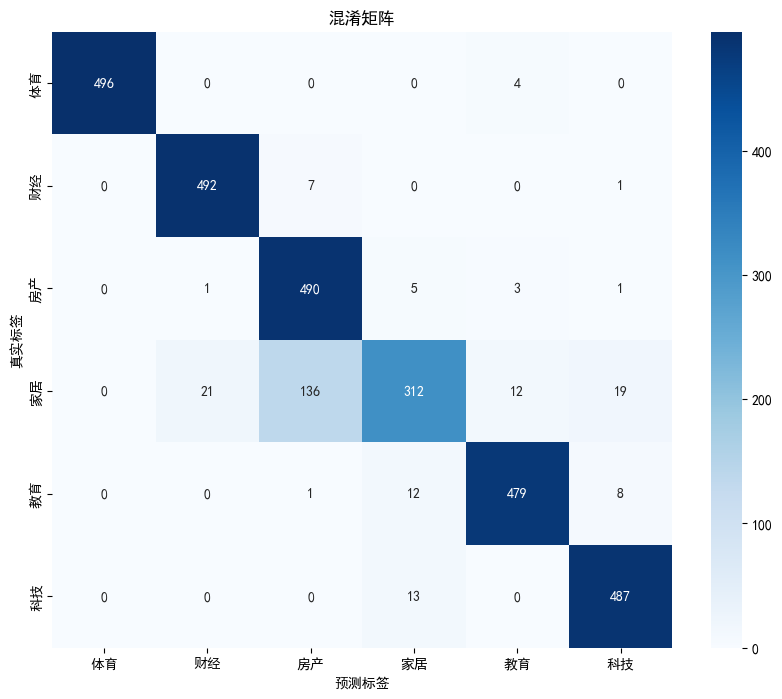

In [22]:
# 输出文本分类结果 红平均 微平均 混淆矩阵
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算宏平均
macro_precision = precision_score(val_labels, val_predictions, average='macro')
macro_recall = recall_score(val_labels, val_predictions, average='macro')
macro_f1 = f1_score(val_labels, val_predictions, average='macro')
print("宏平均精确率：", macro_precision)
print("宏平均召回率：", macro_recall)
print("宏平均F1分数：", macro_f1)

# 计算微平均
micro_precision = precision_score(val_labels, val_predictions, average='micro')
micro_recall = recall_score(val_labels, val_predictions, average='micro')
micro_f1 = f1_score(val_labels, val_predictions, average='micro')
print("微平均精确率：", micro_precision)
print("微平均召回率：", micro_recall)
print("微平均F1分数：", micro_f1)

# 计算混淆矩阵
conf_matrix = confusion_matrix(val_labels, val_predictions)
selected_categories = ["体育", "财经", "房产", "家居", "教育", "科技"]
# 可视化混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=selected_categories, yticklabels=selected_categories)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵')
plt.show()


In [ ]:
# 加载特征向量和标签
import scipy.sparse as sp
import numpy as np
train_features = sp.load_npz('D:\project\data\\train_features.npz')
val_features = sp.load_npz('D:\project\data\\val_features.npz')
test_features = sp.load_npz('D:\project\data\\test_features.npz')
train_labels = np.load('D:\project\data\\train_labels.npy')
val_labels = np.load('D:\project\data\\val_labels.npy')
test_labels = np.load('D:\project\data\\test_labels.npy')

训练集准确率： 0.9690833333333333
验证集准确率： 0.86
测试集准确率： 0.8483333333333334
宏平均精确率： 0.8943919726348799
宏平均召回率： 0.8599999999999999
宏平均F1分数： 0.83604360954812
微平均精确率： 0.86
微平均召回率： 0.86
微平均F1分数： 0.8599999999999999


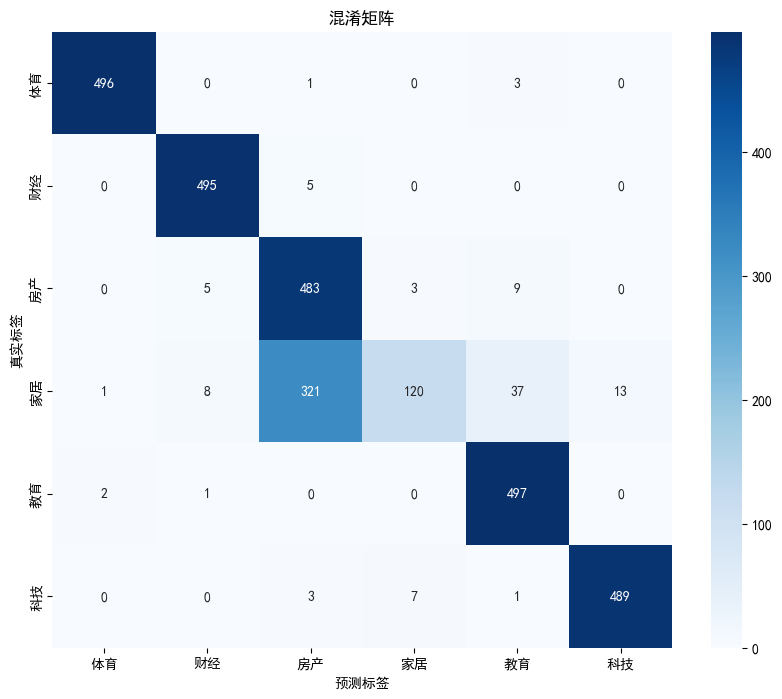

In [23]:
# 运用多项式朴素贝叶斯（Multinomial Naive Bayes）进行文本分类：适合处理离散特征（如词频或 TF-IDF）
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 初始化多项式朴素贝叶斯分类器
nb_classifier = MultinomialNB() # 初始化多项式朴素贝叶斯分类器
# 训练分类器
nb_classifier.fit(train_features, train_labels) # 训练分类器
# 预测测试集、验证集和测试集的标签
train_predictions = nb_classifier.predict(train_features)
val_predictions = nb_classifier.predict(val_features)
test_predictions = nb_classifier.predict(test_features)
# 计算准确率
train_accuracy = accuracy_score(train_labels, train_predictions)
val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)
# 输出准确率
print("训练集准确率：", train_accuracy)
print("验证集准确率：", val_accuracy)
print("测试集准确率：", test_accuracy)
# 计算宏平均
macro_precision = precision_score(val_labels, val_predictions, average='macro')
macro_recall = recall_score(val_labels, val_predictions, average='macro')
macro_f1 = f1_score(val_labels, val_predictions, average='macro')
print("宏平均精确率：", macro_precision)
print("宏平均召回率：", macro_recall)
print("宏平均F1分数：", macro_f1)
micro_precision = precision_score(val_labels, val_predictions, average='micro')
micro_recall = recall_score(val_labels, val_predictions, average='micro')
micro_f1 = f1_score(val_labels, val_predictions, average='micro')
print("微平均精确率：", micro_precision)
print("微平均召回率：", micro_recall)
print("微平均F1分数：", micro_f1)
# 计算混淆矩阵
selected_categories = ["体育", "财经", "房产", "家居", "教育", "科技"]
conf_matrix = confusion_matrix(val_labels, val_predictions)
# 可视化混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=selected_categories, yticklabels=selected_categories)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵')
plt.show()

## 整合后的代码，方便调用模型，输出更加美观

In [6]:
def model_train_predict_result(classifier, train_features, train_labels, val_features, val_labels, test_features, test_labels):
    # 初始化分类器
    nb_classifier = classifier
    # 训练分类器
    nb_classifier.fit(train_features, train_labels) # 训练分类器
    # 预测训练集、验证集和测试集的标签
    train_predictions = nb_classifier.predict(train_features)
    val_predictions = nb_classifier.predict(val_features)
    test_predictions = nb_classifier.predict(test_features)
    # 计算准确率
    train_accuracy = accuracy_score(train_labels, train_predictions)
    val_accuracy = accuracy_score(val_labels, val_predictions)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    # 计算宏平均
    macro_precision = precision_score(val_labels, val_predictions, average='macro')
    macro_recall = recall_score(val_labels, val_predictions, average='macro')
    macro_f1 = f1_score(val_labels, val_predictions, average='macro')

    micro_precision = precision_score(val_labels, val_predictions, average='micro')
    micro_recall = recall_score(val_labels, val_predictions, average='micro')
    micro_f1 = f1_score(val_labels, val_predictions, average='micro')

    # 计算混淆矩阵
    selected_categories = ["体育", "财经", "房产", "家居", "教育", "科技"]
    conf_matrix = confusion_matrix(val_labels, val_predictions)

    # 使用表格输出
    accuracy_data = [
        ["训练集准确率", "{:.4f}".format(train_accuracy)],
        ["验证集准确率", "{:.4f}".format(val_accuracy)],
        ["测试集准确率", "{:.4f}".format(test_accuracy)]
    ]

    macro_data = [
        ["宏平均精确率", "{:.4f}".format(macro_precision)],
        ["宏平均召回率", "{:.4f}".format(macro_recall)],
        ["宏平均F1分数", "{:.4f}".format(macro_f1)]
    ]

    micro_data = [
        ["微平均精确率", "{:.4f}".format(micro_precision)],
        ["微平均召回率", "{:.4f}".format(micro_recall)],
        ["微平均F1分数", "{:.4f}".format(micro_f1)]
    ]

    # 输出表格
    print("=" * 50)
    print("准确率")
    print(tabulate(accuracy_data, headers=["指标", "值"], tablefmt="pretty"))
    print("=" * 50)
    print("宏平均")
    print(tabulate(macro_data, headers=["指标", "值"], tablefmt="pretty"))
    print("=" * 50)
    print("微平均")
    print(tabulate(micro_data, headers=["指标", "值"], tablefmt="pretty"))
    print("=" * 50)
    # 可视化混淆矩阵
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=selected_categories,
        yticklabels=selected_categories,
        annot_kws={"size": 6}
    )
    plt.xlabel('预测标签', fontsize=7)
    plt.ylabel('真实标签', fontsize=7)
    plt.title('混淆矩阵', fontsize=7)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.show()

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import numpy as np
from tabulate import tabulate
# import多种适合TF-IDF文本分类的模型
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import IsolationForest

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import HistGradientBoostingClassifier

# 加载特征向量和标签
train_features = sp.load_npz('D:\project\data\\train_features.npz')
val_features = sp.load_npz('D:\project\data\\val_features.npz')
test_features = sp.load_npz('D:\project\data\\test_features.npz')
train_labels = np.load('D:\project\data\\train_labels.npy')
val_labels = np.load('D:\project\data\\val_labels.npy')
test_labels = np.load('D:\project\data\\test_labels.npy')
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

准确率
+--------------+--------+
|     指标     |   值   |
+--------------+--------+
| 训练集准确率 | 0.9691 |
| 验证集准确率 | 0.8600 |
| 测试集准确率 | 0.8483 |
+--------------+--------+
宏平均
+--------------+--------+
|     指标     |   值   |
+--------------+--------+
| 宏平均精确率 | 0.8944 |
| 宏平均召回率 | 0.8600 |
| 宏平均F1分数 | 0.8360 |
+--------------+--------+
微平均
+--------------+--------+
|     指标     |   值   |
+--------------+--------+
| 微平均精确率 | 0.8600 |
| 微平均召回率 | 0.8600 |
| 微平均F1分数 | 0.8600 |
+--------------+--------+


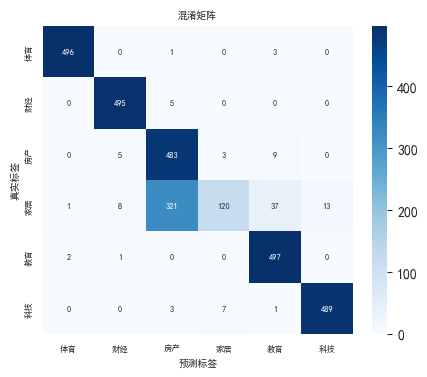

In [8]:
model_train_predict_result(MultinomialNB(), train_features, train_labels, val_features, val_labels, test_features, test_labels)

准确率
+--------------+--------+
|     指标     |   值   |
+--------------+--------+
| 训练集准确率 | 0.9871 |
| 验证集准确率 | 0.9113 |
| 测试集准确率 | 0.8963 |
+--------------+--------+
宏平均
+--------------+--------+
|     指标     |   值   |
+--------------+--------+
| 宏平均精确率 | 0.9169 |
| 宏平均召回率 | 0.9113 |
| 宏平均F1分数 | 0.9077 |
+--------------+--------+
微平均
+--------------+--------+
|     指标     |   值   |
+--------------+--------+
| 微平均精确率 | 0.9113 |
| 微平均召回率 | 0.9113 |
| 微平均F1分数 | 0.9113 |
+--------------+--------+


D:\install\python3.8.10\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


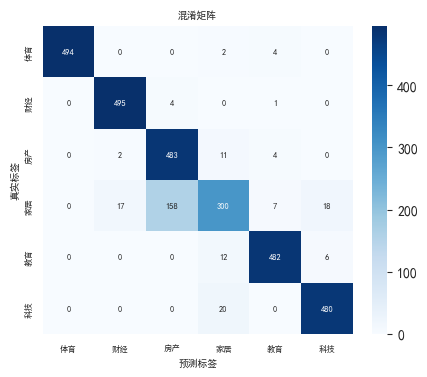

In [9]:
model_train_predict_result(LogisticRegression(), train_features, train_labels, val_features, val_labels, test_features, test_labels)

准确率
+--------------+--------+
|     指标     |   值   |
+--------------+--------+
| 训练集准确率 | 0.9989 |
| 验证集准确率 | 0.9187 |
| 测试集准确率 | 0.9100 |
+--------------+--------+
宏平均
+--------------+--------+
|     指标     |   值   |
+--------------+--------+
| 宏平均精确率 | 0.9247 |
| 宏平均召回率 | 0.9187 |
| 宏平均F1分数 | 0.9150 |
+--------------+--------+
微平均
+--------------+--------+
|     指标     |   值   |
+--------------+--------+
| 微平均精确率 | 0.9187 |
| 微平均召回率 | 0.9187 |
| 微平均F1分数 | 0.9187 |
+--------------+--------+


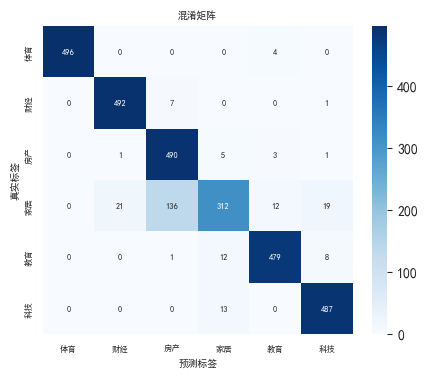

In [7]:
model_train_predict_result(LinearSVC(dual=True), train_features, train_labels, val_features, val_labels, test_features, test_labels)

In [ ]:
model_train_predict_result(DecisionTreeClassifier(), train_features, train_labels, val_features, val_labels, test_features, test_labels)

In [ ]:
model_train_predict_result(RandomForestClassifier(), train_features, train_labels, val_features, val_labels, test_features, test_labels)

In [ ]:
model_train_predict_result(KNeighborsClassifier(), train_features, train_labels, val_features, val_labels, test_features, test_labels)

In [ ]:
model_train_predict_result(GaussianNB(), train_features, train_labels, val_features, val_labels, test_features, test_labels)

In [ ]:
model_train_predict_result(SGDClassifier(), train_features, train_labels, val_features, val_labels, test_features, test_labels)

In [ ]:
model_train_predict_result(GradientBoostingClassifier(n_estimators=25, learning_rate=0.1, max_depth=3), train_features, train_labels, val_features, val_labels, test_features, test_labels)

In [ ]:
model_train_predict_result(AdaBoostClassifier(), train_features, train_labels, val_features, val_labels, test_features, test_labels)

In [ ]:
model_train_predict_result(BaggingClassifier(), train_features, train_labels, val_features, val_labels, test_features, test_labels)

In [ ]:
model_train_predict_result(ExtraTreesClassifier(), train_features, train_labels, val_features, val_labels, test_features, test_labels)

In [ ]:
model_train_predict_result(IsolationForest(), train_features, train_labels, val_features, val_labels, test_features, test_labels)

In [11]:
model_train_predict_result(HistGradientBoostingClassifier(), train_features.toarray(), train_labels, val_features.toarray(), val_labels, test_features.toarray(), test_labels)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.